# Uzduotys


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Dirbsime su širdies ligų duomenimis. Turime lentelę, kurios kintamieji yra paciento duomenys ir klinikiniai rodikliai, o stulpelis target rodo, ar turi pacientas širdies ligą, ar ne. Išanalizuokite duomenis, ir sukurkite 4 modelius, kurie bandys 'diagnozuoti' širdies veiklos sutrikimus. Darbo eiga(apytikriai):

# importuokite bibliotekas, nuskaitykite csv failą (copy paste iš šio dokumento)
# išanalizuokite duomenis, atsispausdinkite keletą, jūsų nuomone, svarbių diagramų.
# patikrinkite, ar duomenyse yra trūkstamų reikšmių, jeigu yra, sutvarkykite.
# paruoškite duomenis modelio apmokymui
# apmokykite LogisticRegression, DecisionTree, RandomForests modelius, nustatykite jų efektyvumą, atsispausdinkite confusion matricas.
# pasidarykite lentelės kopiją, ir jos pagrindu paruoškite duomenis KNearestNeighbor klasifikatoriui.
# apmokykite KNN, nustatykite jo efektyvumą, atsispausdinkite confusion matricą.
# kuris modelis efektyviausias? Palyginkite confusion matricas, įvertinkite, kuri pozicija jose gali būti svarbesnė už patį modelio efektyvumą (hint hint - neteisingos diagnozės..)
# Stulpelių paaiškinimai anglų kalba:

# age
# sex
# chest pain type (4 values)
# resting blood pressure
# serum cholestoral in mg/dl
# fasting blood sugar > 120 mg/dl
# resting electrocardiographic results (values 0,1,2)
# maximum heart rate achieved
# exercise induced angina
# oldpeak = ST depression induced by exercise relative to rest
# the slope of the peak exercise ST segment
# number of major vessels (0-3) colored by flourosopy
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
# dėl medicinos terminų nesijaudinkite, mums tikrai nereikia visko suprasti :)

In [5]:
heart = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/heart.csv')
heart.head()
# heart.info()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='chol', ylabel='trestbps'>

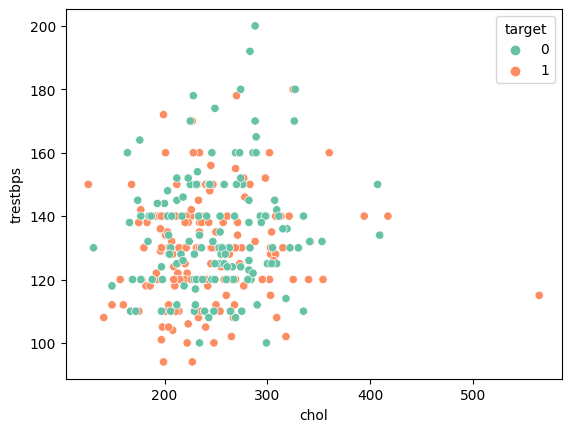

In [112]:
sns.scatterplot(x="chol", y="trestbps", data=heart, hue="target", palette="Set2")

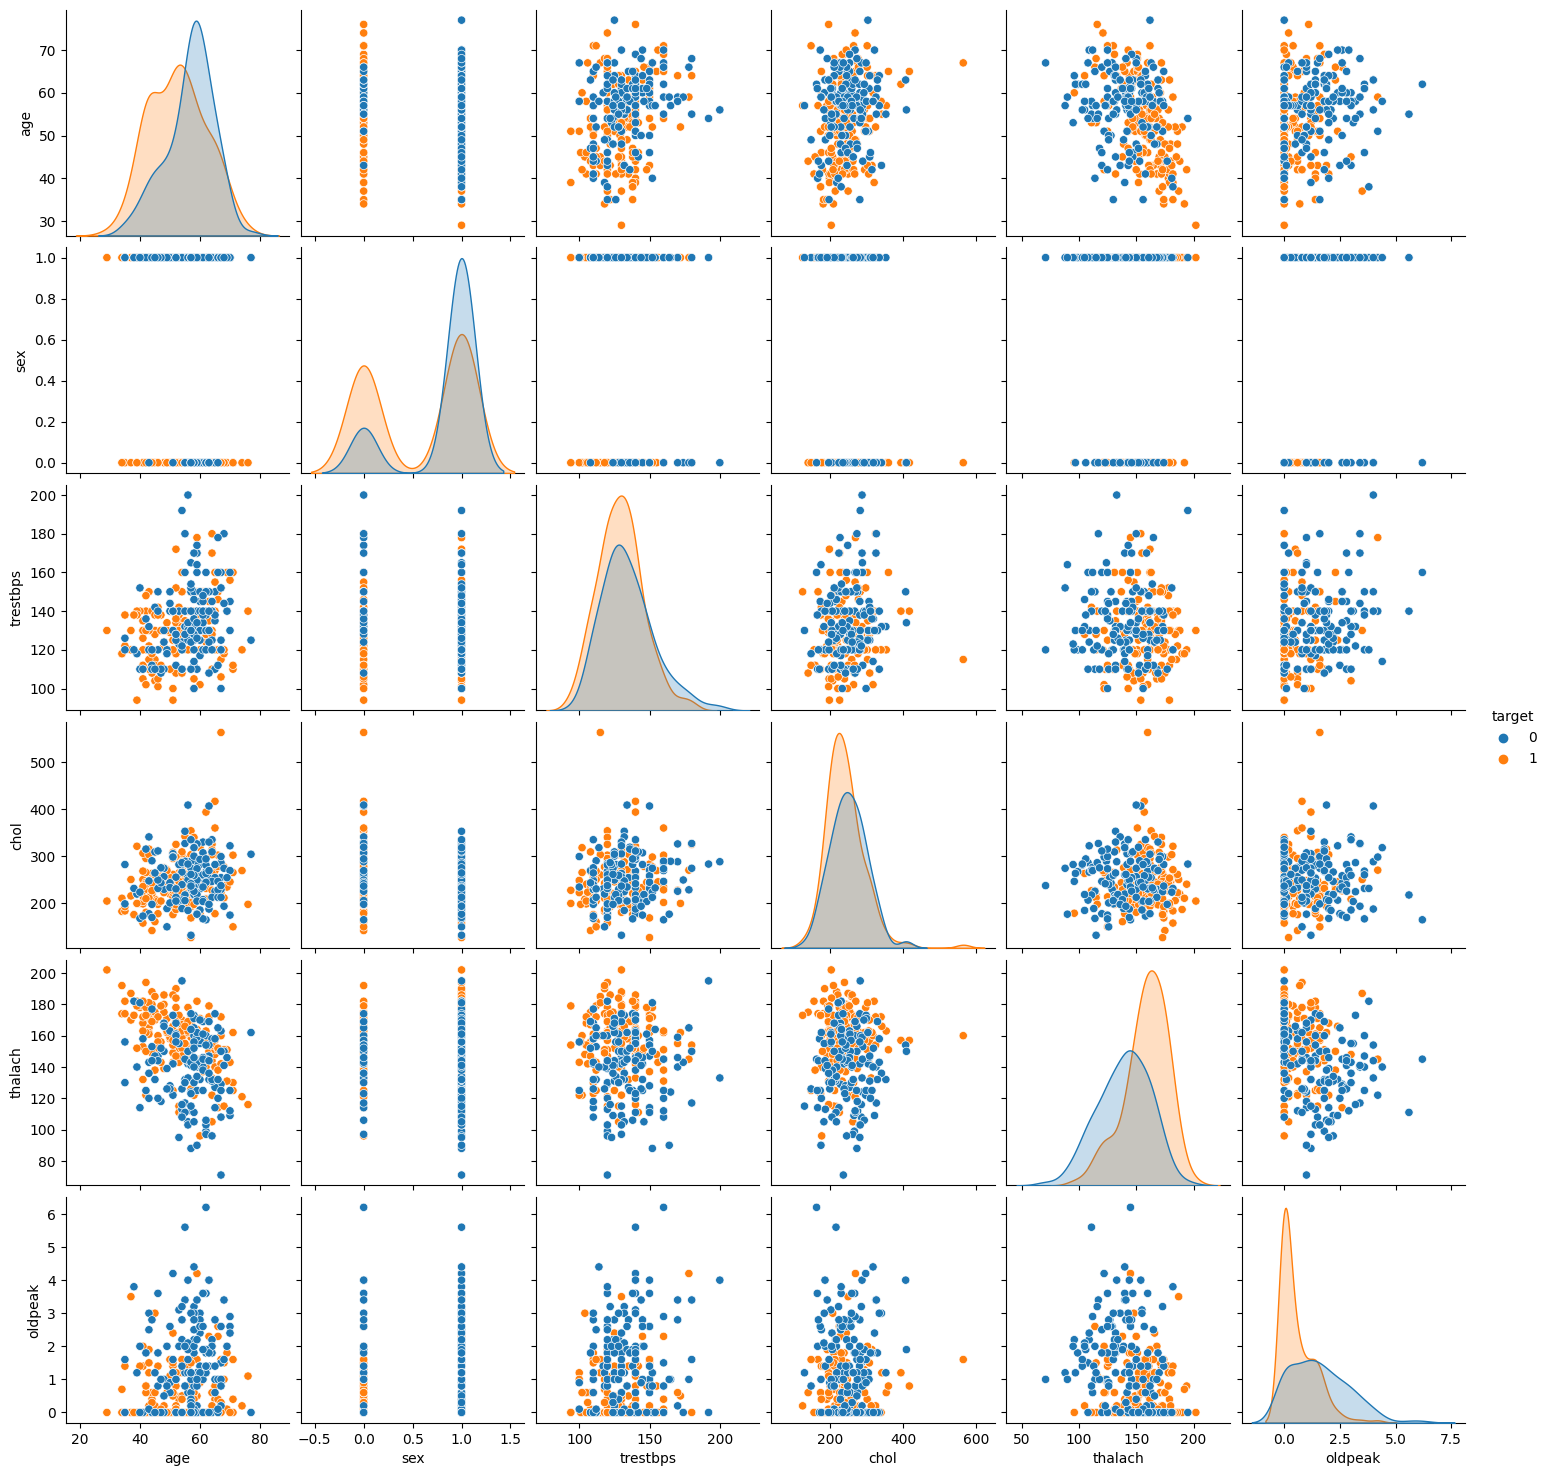

In [129]:
sns.pairplot(heart.drop(columns = ['fbs', 'restecg', 'exang']), hue='target')

<Axes: xlabel='target', ylabel='age'>

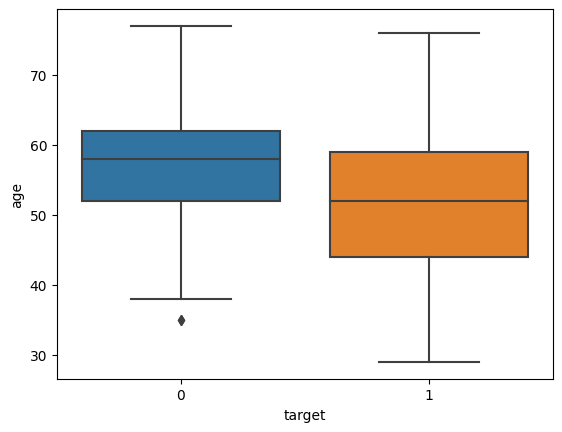

In [114]:
sns.boxplot(x="target", y="age", data=heart)


In [31]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [104]:
# heart.columns

x = heart[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

y = heart["target"]  # Target 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
train_test_split(x, y, test_size=0.65, random_state=55)

In [169]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=100).fit(x_train, y_train)

/Users/ciliukas/CodeAcademy/mano_pirma_repozitorija/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [170]:
model.score(x_train, y_train)

0.9866666666666667

In [107]:
pred = model.predict(x_test)
pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [108]:
spejimai = pd.Series(data=pred, name="My Guess")
res = pd.concat([y_test.reset_index(), spejimai], axis=1)[["target", "My Guess"]]
res.head(15)

,target,My Guess
0,1,0
1,1,1
2,1,1
3,1,1
4,0,0
5,1,1
6,1,1
7,1,0
8,0,0
9,0,0


In [119]:
dumies_cp = pd.get_dummies(heart["cp"])
dumies_cp.columns = ["cp0", "cp1", "cp2", "cp3"]
dumies_slope = pd.get_dummies(heart["slope"])
dumies_slope.columns = ["slope0", "slope1", "slope2"]
dumies_ca = pd.get_dummies(heart["ca"])
dumies_ca.columns = ["ca0", "ca1", "ca2", "ca3", "ca4"]
dumies_thal = pd.get_dummies(heart["thal"])
dumies_thal.columns = ["thal0", "thal1", "thal2", "thal3"]

dumies = pd.concat([dumies_thal, dumies_ca, dumies_slope, dumies_cp], axis=1)
dumies.head()

,thal0,thal1,thal2,thal3,ca0,ca1,ca2,ca3,ca4,slope0,slope1,slope2,cp0,cp1,cp2,cp3
0,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True
1,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False
3,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False
4,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False


In [120]:
heart.drop(columns= ["thal", "ca", "slope", "cp"], inplace=True)
df = pd.concat([heart, dumies], axis=1)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,ca2,ca3,ca4,slope0,slope1,slope2,cp0,cp1,cp2,cp3
0,63,1,145,233,1,0,150,0,2.3,1,...,False,False,False,True,False,False,False,False,False,True
1,37,1,130,250,0,1,187,0,3.5,1,...,False,False,False,True,False,False,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,1,...,False,False,False,False,False,True,False,True,False,False
3,56,1,120,236,0,1,178,0,0.8,1,...,False,False,False,False,False,True,False,True,False,False
4,57,0,120,354,0,1,163,1,0.6,1,...,False,False,False,False,False,True,True,False,False,False


In [121]:
x = df.drop("target", axis=1)

y = df["target"]

In [159]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
train_test_split(x, y, test_size=0.75, random_state=55)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=10000).fit(x_train, y_train)
 

In [160]:
model.score(x_train, y_train)

1.0

In [161]:
spejimai = pd.Series(data=pred, name="My Guess")
res = pd.concat([y_test.reset_index(), spejimai], axis=1)[["target", "My Guess"]]
res.head(15)

,target,My Guess
0,1,0.0
1,1,1.0
2,1,1.0
3,1,1.0
4,0,0.0
5,1,1.0
6,1,1.0
7,1,0.0
8,0,0.0
9,0,0.0


In [183]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000).fit(x_train, y_train)
model.score(x_train, y_train)

1.0

In [182]:
lr_preds = model.predict(x_test)
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_preds)
lr_cm

array([[ 73,  33],
       [ 12, 110]])

In [181]:
from sklearn.linear_model import LogisticRegression
model_newton_cg = LogisticRegression(max_iter=1000).fit(x_train, y_train)

In [179]:
lr_newton_preds = model_newton_cg.predict(x_test)
from sklearn.metrics import confusion_matrix
lr_newton_cm = confusion_matrix(y_test, lr_newton_preds)
lr_newton_cm

array([[ 73,  33],
       [ 11, 111]])

In [204]:
# Decision Trees

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(x_train, y_train)
dtc.score(x_test, y_test)


0.7631578947368421

In [205]:
dt_pred = dtc.predict(x_test)
dtcm = confusion_matrix(y_test, dt_pred)
dtcm

array([[ 68,  38],
       [ 16, 106]])

In [207]:
# Random Forests

0.8026315789473685

In [212]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000).fit(x_train, y_train)
rfc.score(x_test, y_test)

def optimal_est(state, est):
    list_of_dicts = []
    for s in range(state):
        index_valu = {}
        for i in range(est):
            rfc = RandomForestClassifier(n_estimators= i+1, random_state= s+1).fit(x_train, y_train)
            index_valu.update({f"estimators{i+1}":rfc.score(x_test, y_test)})
        list_of_dicts.append(index_valu)
    return list_of_dicts

# Funkcija, kuri praleidžia per ciklus nurodyta skaiciu state, ir estimators parametru. 
# State reikalingas tam, kad fiksuotu random forest atsitiktiniu reiksmiu generatoriaus statusa. 
# Tokiu budu, apmokius modeli is naujo, turėsime tas pačias reikšmes.

In [214]:
optimal = optimal_est(100, 100)

In [215]:
best_value = pd.DataFrame(optimal).T
best_value.columns = columns = list(range(1, len(optimal)+1))
best_value.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
estimators1,0.750000,0.679825,0.811404,0.763158,0.697368,0.723684,0.679825,0.723684,0.780702,0.692982,...,0.701754,0.723684,0.728070,0.728070,0.741228,0.710526,0.763158,0.697368,0.754386,0.736842
estimators2,0.758772,0.723684,0.785088,0.776316,0.714912,0.754386,0.728070,0.745614,0.750000,0.719298,...,0.719298,0.728070,0.741228,0.736842,0.763158,0.732456,0.745614,0.754386,0.745614,0.771930
estimators3,0.771930,0.697368,0.798246,0.758772,0.723684,0.745614,0.723684,0.763158,0.771930,0.728070,...,0.754386,0.741228,0.767544,0.741228,0.828947,0.714912,0.771930,0.745614,0.758772,0.763158
estimators4,0.741228,0.741228,0.802632,0.771930,0.736842,0.780702,0.736842,0.785088,0.798246,0.745614,...,0.758772,0.771930,0.771930,0.763158,0.815789,0.754386,0.771930,0.763158,0.763158,0.789474
estimators5,0.754386,0.776316,0.771930,0.754386,0.741228,0.789474,0.732456,0.780702,0.776316,0.736842,...,0.767544,0.763158,0.771930,0.732456,0.802632,0.750000,0.758772,0.732456,0.754386,0.793860


In [217]:
# best_value.max().idxmax()
best_value.idxmax()[4]

'estimators25'

In [239]:
from sklearn.ensemble import RandomForestClassifier
rfc_optimal = RandomForestClassifier(n_estimators=10, random_state=35).fit(x_train, y_train)
rfc_optimal.score(x_test, y_test)

0.8157894736842105

In [242]:
rfc_preds = rfc_optimal.predict(x_test)
rfc_cm = confusion_matrix(y_test, rfc_preds)
rfc_cm

array([[ 83,  23],
       [ 19, 103]])

In [243]:
y_test.value_counts()

target
1    122
0    106
Name: count, dtype: int64

In [245]:
# KNearrest Neighbors

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)   # StandarScale objektas
scale_features = scaler.transform(x) # Perdaryta reiksme i KNN klasifikatoriu, kuri yra priimtinesne
scale_features[:4]

array([[ 0.9521966 ,  0.68100522,  0.76395577, -0.25633371,  2.394438  ,
        -1.00583187,  0.01544279, -0.69663055,  1.08733806, -0.08151391,
         3.97911213, -1.10076284, -0.79311554,  0.85523597, -0.52259855,
        -0.37867694, -0.26584089, -0.12953194,  3.66450153, -0.92676626,
        -0.93914194, -0.94538352, -0.44455422, -0.63464776,  3.4891135 ],
       [-1.91531289,  0.68100522, -0.09273778,  0.07219949, -0.41763453,
         0.89896224,  1.63347147, -0.69663055,  2.12257273, -0.08151391,
        -0.25131234,  0.9084609 , -0.79311554,  0.85523597, -0.52259855,
        -0.37867694, -0.26584089, -0.12953194,  3.66450153, -0.92676626,
        -0.93914194, -0.94538352, -0.44455422,  1.57567719, -0.28660575],
       [-1.47415758, -1.46841752, -0.09273778, -0.81677269, -0.41763453,
        -1.00583187,  0.97751389, -0.69663055,  0.31091206, -0.08151391,
        -0.25131234,  0.9084609 , -0.79311554,  0.85523597, -0.52259855,
        -0.37867694, -0.26584089, -0.12953194, -0

In [247]:
features = pd.DataFrame(scale_features, columns=x.columns)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   trestbps  303 non-null    float64
 3   chol      303 non-null    float64
 4   fbs       303 non-null    float64
 5   restecg   303 non-null    float64
 6   thalach   303 non-null    float64
 7   exang     303 non-null    float64
 8   oldpeak   303 non-null    float64
 9   thal0     303 non-null    float64
 10  thal1     303 non-null    float64
 11  thal2     303 non-null    float64
 12  thal3     303 non-null    float64
 13  ca0       303 non-null    float64
 14  ca1       303 non-null    float64
 15  ca2       303 non-null    float64
 16  ca3       303 non-null    float64
 17  ca4       303 non-null    float64
 18  slope0    303 non-null    float64
 19  slope1    303 non-null    float64
 20  slope2    303 non-null    float6

In [248]:
from sklearn.neighbors import KNeighborsClassifier
xx_train, xx_test, yy_train, yy_test = \
train_test_split(features, y, test_size=0.4, random_state=42)
heart_knc = KNeighborsClassifier(n_neighbors= 103).fit(xx_train, yy_train)
heart_knc.score(xx_test, yy_test)

0.8934426229508197

In [249]:
knc_preds = heart_knc.predict(xx_test)
knc_cm = confusion_matrix(yy_test, knc_preds)
knc_cm
 

array([[42, 10],
       [ 3, 67]])

In [250]:
def find_optimal(neighbors):
    score_dict = {}
    for i in range(neighbors):
        knc_optimized = KNeighborsClassifier(n_neighbors = i+1).fit(xx_train, yy_train)
        score_dict.update({i+1:knc_optimized.score(xx_test, yy_test)})
    return score_dict

In [251]:
neighbors_dict = find_optimal(132)
max_sample = max(neighbors_dict, key=neighbors_dict.get)
max_sample

101

In [252]:
neighbors_dict[101]


0.8934426229508197

In [253]:
indexes = []
for k, v in neighbors_dict.items():
    if v == 0.8934426229508197:
        indexes.append(k)
indexes


[101, 103]

In [ ]:
# Išvados
# Geriausiai pasirodė KNN modelis, jo įvertinimas aukščiausias, ir false negative (kai spėjimas = 0, o tikrovė = 1) šūvių mažiausiai iš visų bandytų, tik 3. 
# Antroje vietoje logistinė regresija, nors ir mažiau efektyvumo balų surinko už Random forests, bet false-negative pataikymų 5 iš 70. 
# Trečioje vietoje RandomForests, nors ir daugiau efektyvumo balų, bet sėkmingiau spėliojo sveikus pacientus, kas ligos diagnozėje nėra labai gerai:). 
# Taip pat jis surijo nemažai laiko, kol 10000 kartų prasiiteravo beieškant geriausių parametrų.
#  Na o DecisionTree kaip ir kalbėta paskaitoje nėra labai efektyvus modelis.